In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Reading the dataset
kan_data = pd.read_csv("Datasets/kan_output.csv", header=None)
kan_data

,0,1,2,3
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [16]:
# Define the new column names
column_names = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Rename the columns
kan_data.columns = column_names

# Basic overview of the dataset
print(kan_data.head())

   HCHO Reading      Location Current Date   Next Date
0      0.000176  Kandy Proper   2019-01-01  2019-01-02
1      0.000092  Kandy Proper   2019-01-02  2019-01-03
2           NaN  Kandy Proper   2019-01-03  2019-01-04
3      0.000191  Kandy Proper   2019-01-04  2019-01-05
4      0.000122  Kandy Proper   2019-01-05  2019-01-06


In [17]:
# Data Schema
print(kan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  1033 non-null   float64
 1   Location      1826 non-null   object 
 2   Current Date  1826 non-null   object 
 3   Next Date     1826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 57.2+ KB
None


In [18]:
# Checking for null values
print(kan_data.isnull().sum())

HCHO Reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64


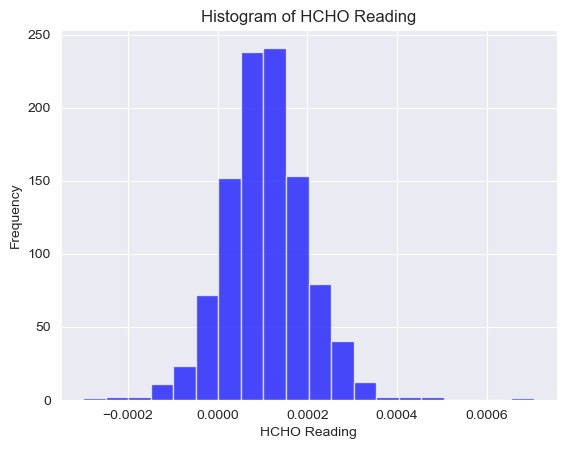

In [19]:
# Plotting histogram for 'HCHO Reading' column
plt.hist(kan_data['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()

In [20]:
# Replace null values in 'HCHO Reading' column with the mean
hcho_mean = kan_data['HCHO Reading'].mean()
kan_data['HCHO Reading'].fillna(hcho_mean, inplace=True)

In [21]:
# Check if there are any null values left
print(kan_data.isnull().sum())

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


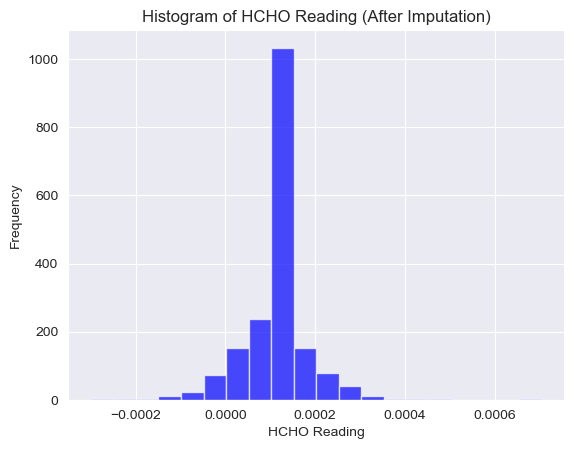

In [22]:
# Plotting histogram after imputation
plt.hist(kan_data['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading (After Imputation)')
plt.grid(True)
plt.show()

In [24]:
# Remove duplicates
kan_data_no_duplicates = kan_data.drop_duplicates()

In [26]:
# Loop through each column and print unique values
for col_name in kan_data_no_duplicates.columns:
    unique_values = kan_data_no_duplicates[col_name].unique()
    print(f"Unique values in column '{col_name}':")
    for value in unique_values:
        print(value)
    print()

Unique values in column 'HCHO Reading':
0.0001760713459877
9.220391253917748e-05
0.00010637609562085859
0.0001908681983853
0.0001219517840206
-6.514086129388805e-05
0.0001632382063926
-6.735205533914268e-05
0.0001279693658243
4.546048424126012e-05
3.600074175192105e-05
0.000128662969801
9.63639634671553e-05
0.0001200971278484
-0.0001197246567136
0.0002825263761529
7.150631692646835e-05
0.0002833741508232
0.0002659407549829
5.8649506506635245e-05
-3.940558338151006e-06
0.0001092931769982
7.03689579655349e-05
0.0001647056354631
0.0001130180465294
0.0001141272676955
-3.000156427858255e-05
1.5133123262338617e-05
9.510527997488848e-05
3.0694719505487384e-05
3.521572625649498e-05
0.000144733119523
7.648542999350917e-05
6.33983046513048e-05
6.099527672631667e-05
1.8666852257755813e-05
0.0001525741076541
0.0001316059809503
5.400887798459826e-05
3.130874441109665e-05
-1.98339014766147e-06
0.0001148911736891
0.0002118789208893
3.663116612296087e-05
4.493778690247384e-05
0.000113648535998
0.00011

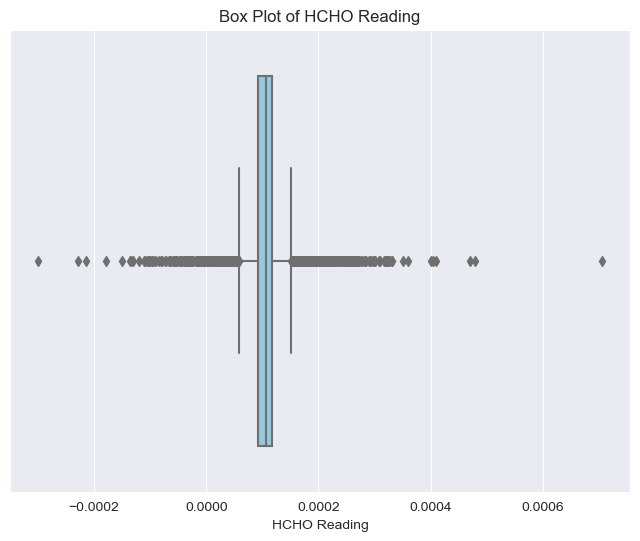

In [27]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=kan_data_no_duplicates['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()

      HCHO Reading      Location Current Date   Next Date
0         0.000176  Kandy Proper   2019-01-01  2019-01-02
1         0.000092  Kandy Proper   2019-01-02  2019-01-03
2         0.000106  Kandy Proper   2019-01-03  2019-01-04
3         0.000191  Kandy Proper   2019-01-04  2019-01-05
4         0.000122  Kandy Proper   2019-01-05  2019-01-06
...            ...           ...          ...         ...
1821      0.000106  Kandy Proper   2023-12-27  2023-12-28
1822      0.000106  Kandy Proper   2023-12-28  2023-12-29
1823      0.000106  Kandy Proper   2023-12-29  2023-12-30
1824      0.000056  Kandy Proper   2023-12-30  2023-12-31
1825      0.000106  Kandy Proper   2023-12-31  2024-01-01

[1825 rows x 4 columns]


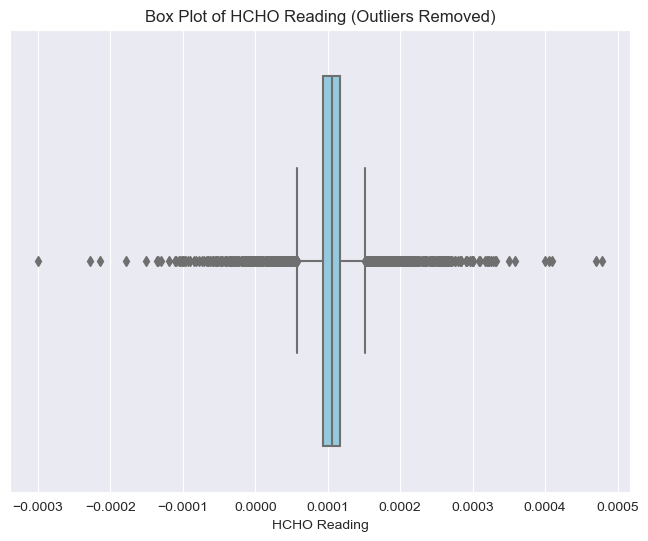

In [28]:
# Filter out rows with 'HCHO Reading' above 0.0006
kan_data_filtered = kan_data_no_duplicates[kan_data_no_duplicates['HCHO Reading'] <= 0.0006]

# Show the DataFrame after removing outliers
print(kan_data_filtered)

# Create box plot after filtering
plt.figure(figsize=(8, 6))
sns.boxplot(x=kan_data_filtered['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading (Outliers Removed)')
plt.xlabel('HCHO Reading')
plt.show()

In [29]:
# Save the DataFrame to a new CSV file
kan_data_filtered.to_csv("kan_output.csv", index=False)